<a href="https://colab.research.google.com/github/souradipta93/Predictive_Analytics/blob/main/Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Logistic Regression-BlueOrRed

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Suppress warning messages
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mydata=pd.read_csv("BlueOrRed.csv")
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Undecided        10000 non-null int64
Age              10000 non-null int64
HomeOwner        10000 non-null int64
Female           10000 non-null int64
Married          10000 non-null int64
HouseholdSize    10000 non-null int64
Income           10000 non-null float64
Education        10000 non-null int64
Church           10000 non-null int64
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


In [ ]:
# Calculate baseline proportion of Y variable
mydata['Undecided'].value_counts()

0    5986
1    4014
Name: Undecided, dtype: int64

In [ ]:
Y=mydata.loc[:,"Undecided"]
X=mydata.iloc[:,1:9]
X
 

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,51,1,1,1,4,171.0,15,0
1,37,1,1,1,3,96.0,18,0
2,53,1,1,1,6,86.0,20,0
3,33,1,1,1,2,176.0,18,1
4,46,1,1,1,6,420.0,15,1
5,34,1,1,1,6,109.0,15,0
6,61,1,0,1,3,39.0,20,1
7,55,1,0,1,6,132.0,16,0
8,35,1,1,1,5,92.0,18,1
9,49,1,1,1,3,27.0,16,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### Exploratory data analysis

### Model building

In [ ]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(Y_train.astype(float), sm.add_constant(X_train.astype(float)))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.527452
         Iterations 6


In [ ]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              Undecided   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7991
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.2166
Time:                        04:09:31   Log-Likelihood:                -4219.6
converged:                       True   LL-Null:                       -5386.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.6985      0.188    -19.723      0.000      -4.066      -3.331
Age              -0.0147      0.003     -5.687      0.000      -0.020      -0.010
HomeOwner         0.5033      0.081     

### Step1 - overall significance of the model

In [ ]:
#P-value of the overall model
lg.llr_pvalue

0.0

** Since the pval is extremely low, the model is overwhelmingly significant **

### Step2 - Interpreting McFadden R2

In [ ]:
#Calculating gain
Gain = lg.llf-lg.llnull
G2Stat = Gain *2

print("Gain =",Gain, "G2Stat =",G2Stat)

Gain = 1166.902604979602 G2Stat = 2333.805209959204


In [ ]:
#Calculating McFadden R2
McFaddenR2 = 1-(lg.llf/lg.llnull)
print("McFaddenR2 = ", McFaddenR2)

McFaddenR2 =  0.21663398782046273


## ** Interpretation of McFadden R2 -22.00% of the uncertainty produced by the intercept only model is explained by the full model**

### Step3 - Individual coefficient significance

In [ ]:
# Individual coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.4f}'.format
lgcoef

,coef,pval
const,-3.6985,0.0000
Age,-0.0147,0.0000
HomeOwner,0.5033,0.0000
Female,1.1581,0.0000
Married,0.2522,0.0005
HouseholdSize,0.1774,0.0000
Income,-0.0061,0.0000
Education,0.2087,0.0000
Church,-1.6479,0.0000


### Step4 - Calculate and interpret Odds Ratio & probability

In [ ]:
#Exponential of coef to get odds ratio
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)

#Probability from Odds ratio
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])

#Sort dataframe by decreasing Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef

,coef,pval,Odds_ratio,probability
Female,1.1581,0.0000,3.1840,0.7610
HomeOwner,0.5033,0.0000,1.6542,0.6232
Married,0.2522,0.0005,1.2868,0.5627
Education,0.2087,0.0000,1.2320,0.5520
HouseholdSize,0.1774,0.0000,1.1942,0.5442
Income,-0.0061,0.0000,0.9939,0.4985
Age,-0.0147,0.0000,0.9854,0.4963
Church,-1.6479,0.0000,0.1925,0.1614
const,-3.6985,0.0000,0.0248,0.0242


Make the prediction

In [ ]:
#Compute class from predicted probability
X_train=sm.add_constant(X_train)
pred_prob=lg.predict(X_train)
pred_class = (pred_prob>0.5).astype(np.int)
pred_class

9254    0
1561    0
1670    0
6087    0
6669    1
5933    0
8829    1
7945    0
3508    1
2002    1
5866    1
168     0
2588    1
5905    0
9529    1
6384    1
7824    0
9779    0
4629    0
8560    0
9291    0
6874    0
6521    0
8979    0
6647    0
9825    0
210     1
5278    0
1919    0
718     1
       ..
2734    1
189     1
9167    0
2747    1
2047    0
7849    1
2558    0
9274    0
8666    0
6396    1
3385    1
4555    0
1184    1
6420    1
5051    1
5311    0
2433    1
6949    1
769     0
1685    0
8322    0
5578    0
4426    0
466     1
6265    0
5734    0
5191    1
5390    1
860     0
7270    1
Length: 8000, dtype: int32

### Step5 - Model performance measure

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [ ]:
#Confusion matrix
confusion_matrix(Y_train.astype(float), pred_class)

array([[4002,  792],
       [1216, 1990]], dtype=int64)

In [ ]:
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y_train.astype(float), pred_class),2)
recall = round(recall_score(Y_train.astype(float), pred_class),2)
precision = round(precision_score(Y_train.astype(float), pred_class),2)

print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

accuracy:  0.75
recall:  0.62
precision:  0.72


### Step6 - ROC curve and AUC

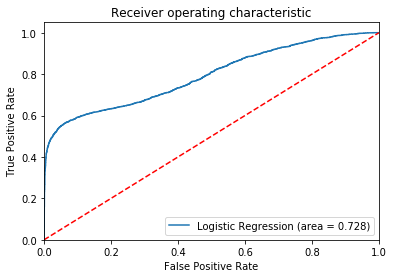

In [ ]:
# ROC curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_train.astype(float), pred_class)
fpr, tpr, thresholds = roc_curve(Y_train.astype(float), pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Compute class from predicted probability
X_test=sm.add_constant(X_test)
pred_prob=lg.predict(X_test)
pred_class = (pred_prob>0.5).astype(np.int)
pred_class

6252    1
4684    0
1731    1
4742    0
4521    0
6340    0
576     0
5202    0
6363    0
439     1
2750    0
7487    1
5272    0
5653    0
3999    1
6033    0
582     1
9930    0
7051    0
8158    0
9896    0
2249    0
4640    0
9485    0
4947    1
9920    0
1963    0
8243    0
6590    0
8847    0
       ..
4848    0
2291    1
2133    0
550     0
1740    0
5289    1
1817    0
4698    0
5181    0
3018    1
17      0
1770    1
1888    1
2152    0
1642    1
7846    0
4193    0
9432    0
8898    0
533     0
132     1
7722    0
8458    0
964     0
8719    1
6412    0
8285    0
7853    1
1095    0
6929    1
Length: 2000, dtype: int32

In [ ]:
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y_test.astype(float), pred_class),2)
recall = round(recall_score(Y_test.astype(float), pred_class),2)
precision = round(precision_score(Y_test.astype(float), pred_class),2)

print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

accuracy:  0.74
recall:  0.62
precision:  0.71


In [ ]:
#Confusion matrix
confusion_matrix(Y_test.astype(float), pred_class)

array([[989, 203],
       [311, 497]], dtype=int64)